## PreProcessing Step
### the following issues need to be handled
1. some images are inverted (white is used for font and black for background unlike the majority)
2. light differs (you need to binarize and enhance the image quality)



In [1]:
from preprocessing import *
from feature_extraction import *
import torch
from torch import nn, optim
from nn_utils import nn_train, nn_predict, nn_accuracy

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
classes = ['diwani', 'naskh', 'parsi', 'rekaa', 'thuluth', 'maghribi', 'kufi', 'mohakek', 'Squar-kufic']

In [181]:
X, Y = load_data()
print(X.shape)
print(Y.shape)
print(X[0])
print(Y[0])

(1684,)
(1684,)
ACdata_base/1/0001.jpg
1


In [453]:
split_data(X, Y)

In [452]:
class Preprocessing(object):
    def __call__(self,img):
        binaryImage = binraization(np.asarray(img.convert('L')))
        return binaryImage


class FeatureExtraction(object):
    def __call__(self,img):
        feature_dim = 360
        features = extract_EOH(img, feature_dim)
        return features


In [454]:
from torchvision import datasets, transforms, models

train_transforms = transforms.Compose([Preprocessing(), FeatureExtraction()])
valid_transforms = transforms.Compose([Preprocessing(), FeatureExtraction()])
test_transforms = transforms.Compose([Preprocessing(), FeatureExtraction()])

train_data = np.array(datasets.ImageFolder('data/train', transform=train_transforms), dtype=object)
X_train, Y_train = np.stack(train_data[:, 0]), train_data[:, 1].astype(np.uint8)
valid_data = np.array(datasets.ImageFolder('data/valid', transform=valid_transforms), dtype=object)
X_valid, Y_valid = np.stack(valid_data[:, 0]), valid_data[:, 1].astype(np.uint8)
test_data = np.array(datasets.ImageFolder('data/test', transform=test_transforms), dtype=object)
X_test, Y_test = np.stack(test_data[:, 0]), test_data[:, 1].astype(np.uint8)

In [455]:
X_train = torch.from_numpy(X_train)
print(X_train.shape)
Y_train = torch.from_numpy(Y_train)
print(Y_train.shape)
X_valid = torch.from_numpy(X_valid)
print(X_valid.shape)
Y_valid = torch.from_numpy(Y_valid)
print(Y_valid.shape)
X_test = torch.from_numpy(X_test)
print(X_test.shape)
Y_test = torch.from_numpy(Y_test)
print(Y_test.shape)

torch.Size([1010, 360])
torch.Size([1010])
torch.Size([337, 360])
torch.Size([337])
torch.Size([337, 360])
torch.Size([337])


In [ ]:
from nn_utils import *

model = nn.Sequential(nn.Linear(360, 1024),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(1024, 512),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(512, 9),
                    nn.LogSoftmax(dim=1))

train_losses, validation_losses =\
    nn_train(model, X_train, Y_train, X_valid, Y_valid, epochs=2000, lr=0.01, validate_every=10, debug=False)

plt.plot(train_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()


model.load_state_dict(torch.load('model.pth'))
train_predictions = nn_predict(model, X_train)
validation_predictions = nn_predict(model, X_valid)
test_predictions = nn_predict(model, X_test)

print(f'training accuracy = {nn_accuracy(train_predictions, Y_train) * 100}%')
print(f'validation accuracy = {nn_accuracy(validation_predictions, Y_valid) * 100}%')
print(f'test accuracy = {nn_accuracy(test_predictions, Y_test) * 100}%')

loss = 0.006476608864985163, accuracy = 23.14540059347181
loss = 0.003981314002583218, accuracy = 54.00593471810089
loss = 0.0025846439936040772, accuracy = 66.76557863501483
loss = 0.0016025778801575612, accuracy = 77.74480712166172
loss = 0.0010938652368256883, accuracy = 86.94362017804154
loss = 0.0008220554989947763, accuracy = 90.50445103857567
loss = 0.0006837225809295383, accuracy = 92.28486646884274
loss = 0.0006268677531081066, accuracy = 93.76854599406528
loss = 0.0005757516852472232, accuracy = 94.06528189910979
loss = 0.0005192389650939127, accuracy = 95.25222551928783
loss = 0.0005125580272617963, accuracy = 94.65875370919882
loss = 0.0005029160474103707, accuracy = 94.95548961424333
loss = 0.000502814259656459, accuracy = 94.65875370919882
loss = 0.0004940489279410252, accuracy = 94.65875370919882
loss = 0.00047867813697554594, accuracy = 94.95548961424333
loss = 0.0004641238146790411, accuracy = 96.43916913946587
loss = 0.00044900833322315613, accuracy = 95.5489614243323

()


TypeError: Image data of dtype <U22 cannot be converted to float

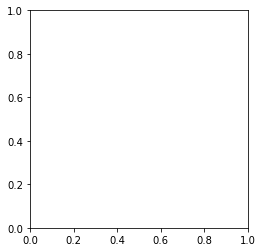

In [392]:
random_index = np.random.randint(0, 1683)

# Plot the image.
print(X[random_index].shape)
plt.imshow(X[random_index], 'gray')
plt.axis("off")

print("The ground-truth value of this image is: ",
      classes[Y[random_index]-1])

In [391]:
# for random_index in np.random.randint(0, 1683, 100):
    binaryImage = binraization(X[random_index])
    edges, skeleton, textOnly, diacritics = extractImagesSet(binaryImage//255)

    # plt.imshow(binaryImage, 'gray')
    # plt.title('binary image')
    # plt.axis("off")
    # plt.show()


    plt.imshow(edges, 'gray')
    plt.title('edges')
    plt.axis("off")
    plt.show()

    horizontal = np.copy(1-edges)
    vertical = np.copy(1-edges)

    cols = horizontal.shape[1]
    horizontal_size = cols // 20
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    horizontal = cv2.morphologyEx(horizontal, cv2.MORPH_OPEN, horizontalStructure)

    rows = vertical.shape[0]
    verticalsize = rows // 20
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    vertical = cv2.morphologyEx(vertical, cv2.MORPH_OPEN, verticalStructure)

    show_images([horizontal], ['horizontal lines'])
    show_images([vertical], ['vertical lines'])

    HL = cv2.connectedComponents(horizontal)[0]-1
    VL = cv2.connectedComponents(vertical)[0]-1

    print(f'number of horizontal lines:{HL}')
    print(f'number of vertical lines:{VL}')

IndentationError: unexpected indent (<ipython-input-391-0d763f24a9ec>, line 2)

In [181]:
VL = cv2.connectedComponents(vertical)[0]-1

# for i in range(0, numLabels):
#     if i == 0:
#         text = "examining component {}/{} (background)".format(
#             i + 1, numLabels)
#     else:
#         text = "examining component {}/{}".format( i + 1, numLabels)
    
#     print("[INFO] {}".format(text))
    
#     x = stats[i, cv2.CC_STAT_LEFT]
#     y = stats[i, cv2.CC_STAT_TOP]
#     w = stats[i, cv2.CC_STAT_WIDTH]
#     h = stats[i, cv2.CC_STAT_HEIGHT]
#     area = stats[i, cv2.CC_STAT_AREA]
#     (cX, cY) = centroids[i]

#     output = cv2.cvtColor(vertical*255, cv2.COLOR_GRAY2BGR)
#     cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
#     cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    
#     show_images([output], [f'component #{i}'])
    

ValueError: not enough values to unpack (expected 4, got 2)

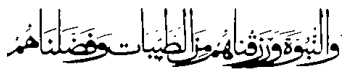

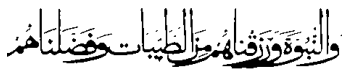

In [85]:

random_index = np.random.randint(0, 1683)
img = X[random_index].copy()
plt.figure()
plt.imshow(img, 'gray')
plt.axis("off")
plt.show()

binaryImage = binraization(img)
plt.figure()
plt.imshow(binaryImage, 'gray')
plt.axis("off")
plt.show()



In [90]:
feature_dim = 360
features = np.zeros((X.shape[0], feature_dim))
for i in range(X.shape[0]):
    X[i] = binraization(X[i])

#     edges, skeleton, textOnly, diacritics = extractImagesSet(X[i] // 255)
    features[i] = extract_EOH(X[i], feature_dim)

# features, labels = [], []

# for i in range(X.shape[0]):
#     X[i] = binraization(X[i])
# #     Xi_textOnly, _ = diacriticsSegmentationClustering(X[i]//255)
#     features.append(extract_hog_features(X[i]))
# #     features.append(extract_hog_features(Xi_textOnly*255))
# #     labels.append(Y[i])
# #     labels.append(Y[i])

# features = np.asarray(features)
# # labels = np.asarray(labels)
# print(features.shape)
# # print(labels.shape)

In [88]:
# print(X_train.shape, Y_train.shape)
# print(X_valid.shape, Y_valid.shape)
# print(X_test.shape, Y_test.shape)

# features, labels = [], []

# for i in range(X_train.shape[0]):
#     X_train[i] = binraization(X_train[i])
#     Xi_textOnly, _ = diacriticsSegmentationClustering(X_train[i]//255)
#     features.append(extract_hog_features(X_train[i]))
#     features.append(extract_hog_features(Xi_textOnly*255))
#     labels.append(Y_train[i])
#     labels.append(Y_train[i])

# features = np.asarray(features)
# labels = np.asarray(labels)

# features_valid, labels_valid = [], []

# for i in range(X_valid.shape[0]):
#     X_valid[i] = binraization(X_valid[i])
#     Xi_textOnly, _ = diacriticsSegmentationClustering(X_valid[i]//255)
#     features_valid.append(extract_hog_features(X_valid[i]))
#     features_valid.append(extract_hog_features(Xi_textOnly*255))
#     labels_valid.append(Y_valid[i])
#     labels_valid.append(Y_valid[i])


# features_valid = np.asarray(features_valid)
# labels_valid = np.asarray(labels_valid)
    
# features_test, labels_test = [], []

# for i in range(X_test.shape[0]):
#     X_test[i] = binraization(X_test[i])
#     Xi_textOnly, _ = diacriticsSegmentationClustering(X_test[i]//255)
#     features_test.append(extract_hog_features(X_test[i]))
#     features_test.append(extract_hog_features(Xi_textOnly*255))
#     labels_test.append(Y_test[i])
#     labels_test.append(Y_test[i])

# features_test = np.asarray(features_test)
# labels_test = np.asarray(labels_test)

# print(features.shape, labels.shape)
# print(features_valid.shape, labels_valid.shape)
# print(features_test.shape, labels_test.shape)

In [386]:
X_train = torch.from_numpy(X_train)
print(X_train.shape)
Y_train = torch.from_numpy(Y_train)
print(Y_train.shape)
X_valid = torch.from_numpy(X_valid)
print(X_valid.shape)
Y_valid = torch.from_numpy(Y_valid)
print(Y_valid.shape)
X_test = torch.from_numpy(X_test)
print(X_test.shape)
Y_test = torch.from_numpy(Y_test)
print(Y_test.shape)

torch.Size([1010, 360])
torch.Size([1010])
torch.Size([337, 360])
torch.Size([337])
torch.Size([337, 360])
torch.Size([337])


loss = 0.006547279103219686, accuracy = 9.495548961424333
loss = 0.004589021029033718, accuracy = 33.531157270029674
loss = 0.0027358818478683336, accuracy = 67.06231454005935
loss = 0.0018284462326004526, accuracy = 73.29376854599407
loss = 0.001381113373561146, accuracy = 83.67952522255193
loss = 0.0009377354684144877, accuracy = 89.91097922848664
loss = 0.000870203140581397, accuracy = 89.31750741839762
loss = 0.0007279209284117385, accuracy = 91.69139465875371
loss = 0.0005881495397946955, accuracy = 92.28486646884274
loss = 0.0005608561396245079, accuracy = 91.98813056379822
loss = 0.0005198900618256023, accuracy = 92.28486646884274
loss = 0.0005038214366584574, accuracy = 91.98813056379822
loss = 0.0004777633737032067, accuracy = 92.87833827893175
loss = 0.0004759374287432662, accuracy = 93.76854599406528
loss = 0.00047382765424711413, accuracy = 93.47181008902076
loss = 0.0004732905049706071, accuracy = 93.17507418397626
loss = 0.00047325694419509935, accuracy = 93.4718100890207

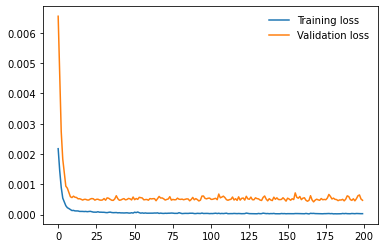

training accuracy = 99.70297029702971%
validation accuracy = 94.3620178041543%
test accuracy = 93.47181008902076%


In [388]:
from nn_utils import *

model = nn.Sequential(nn.Linear(feature_dim, 1024),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(1024, 512),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(512, 9),
                    nn.LogSoftmax(dim=1))

train_losses, validation_losses =\
    nn_train(model, X_train, Y_train, X_valid, Y_valid, epochs=2000, lr=0.01, validate_every=10, debug=False)

plt.plot(train_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()


model.load_state_dict(torch.load('model.pth'))
train_predictions = nn_predict(model, X_train)
validation_predictions = nn_predict(model, X_valid)
test_predictions = nn_predict(model, X_test)

print(f'training accuracy = {nn_accuracy(train_predictions, Y_train) * 100}%')
print(f'validation accuracy = {nn_accuracy(validation_predictions, Y_valid) * 100}%')
print(f'test accuracy = {nn_accuracy(test_predictions, Y_test) * 100}%')

In [383]:
model.load_state_dict(torch.load('model.pth'))

train_predictions = nn_predict(model, X_train)
validation_predictions = nn_predict(model, X_valid)
test_predictions = nn_predict(model, X_test)

print(f'training accuracy = {nn_accuracy(train_predictions, Y_train) * 100}%')
print(f'validation accuracy = {nn_accuracy(validation_predictions, Y_valid) * 100}%')
print(f'test accuracy = {nn_accuracy(test_predictions, Y_test) * 100}%')

training accuracy = 99.9009900990099%
validation accuracy = 96.14243323442136%
test accuracy = 97.92284866468842%


In [50]:
from sklearn import svm, metrics

poly = svm.SVC(kernel = 'poly', C=1, degree=4, decision_function_shape='ovo').fit(X_train, Y_train)

train_predictions = poly.predict(X_train)
validation_predictions = poly.predict(X_valid)
test_predictions = poly.predict(X_test)

print(f'training accuracy = {metrics.accuracy_score(Y_train, train_predictions) * 100}%')
print(f'validation accuracy = {metrics.accuracy_score(Y_valid, validation_predictions) * 100}%')
print(f'test accuracy = {metrics.accuracy_score(Y_test, test_predictions) * 100}%')

training accuracy = 94.75247524752474%
validation accuracy = 93.76854599406528%
test accuracy = 92.87833827893175%
